In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

# 한글 폰트 설정
plt.rc('font', family='AppleGothic')  
# 마이너스 폰트 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
data = pd.read_csv('./data/ev_breakdown.csv' ,encoding='cp949')

df = pd.DataFrame(data)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   호선         565 non-null    object        
 1   역명         566 non-null    object        
 2   장비         566 non-null    object        
 3   호기         566 non-null    object        
 4   고장발생일자     566 non-null    datetime64[ns]
 5   고장발생시간     566 non-null    object        
 6   조치완료일자     566 non-null    object        
 7   조치완료시간     566 non-null    object        
 8   조치소요시간     566 non-null    object        
 9   고장원인       566 non-null    object        
 10  month      566 non-null    object        
 11  weekday    566 non-null    object        
 12  week_type  566 non-null    object        
 13  조치소요시간(분)  566 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(12)
memory usage: 62.0+ KB


In [40]:
df.describe()

,호선,역명,장비,호기,고장발생일자,고장발생시간,조치완료일자,조치완료시간,조치소요시간,고장원인
count,565,566,566,566,566,566,566,566,566,566
unique,3,68,1,7,365,410,364,184,184,10
top,1호선,월촌,E/L,#1,2024-06-24,05:30,2023-02-28,15:00,00:45,(E/L)도어장치 장애
freq,321,40,566,225,5,15,6,18,18,200


In [41]:
df['고장발생일자'] = pd.to_datetime(df['고장발생일자'])  
df['month']    = df['고장발생일자'].dt.month_name() 
df['weekday']  = df['고장발생일자'].dt.day_name() 
# 평일/주말 구분 추가
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
df['week_type'] = df['weekday'].apply(lambda x: 'Weekday' if x in weekdays else 'Weekend')

In [42]:
df['weekday'].value_counts()

weekday
Monday       110
Tuesday       93
Wednesday     89
Friday        85
Thursday      79
Saturday      64
Sunday        46
Name: count, dtype: int64

# Seaborn 시각화

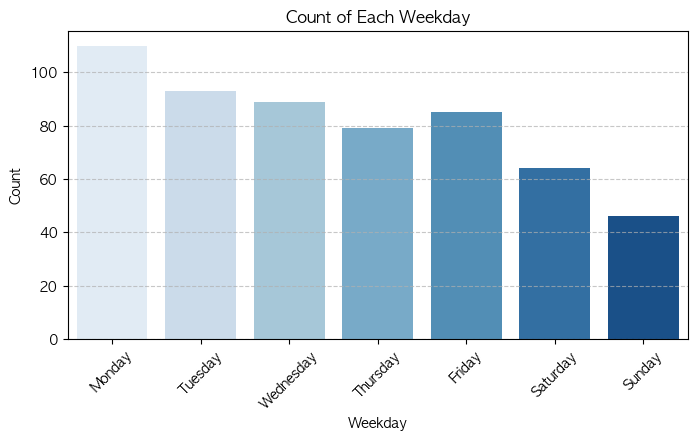

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
weekday_counts = df['weekday'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    fill_value=0
)

plt.figure(figsize=(8, 4))


sns.barplot(x=weekday_counts.index, y=weekday_counts.values, hue=weekday_counts.index, palette="Blues", legend=False)

# 그래프 설정
plt.xlabel('Weekday')
plt.ylabel('Count')
plt.title('Count of Each Weekday')
plt.xticks(rotation=45)  # X축 라벨 회전
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 그래프 출력
plt.show()

월요일이 가장 고장이 많은데 어떤 이유로 가장 많을까?

In [44]:
df[df['weekday'] == 'Monday']['고장원인'].value_counts()

고장원인
(E/L)도어장치 장애    51
(E/L)제어장치 장애    23
(E/L)부속장치 장애    15
(E/L)구동장치 장애    14
(E/L)감지장치 장애     6
(E/S)제어장치 장애     1
Name: count, dtype: int64

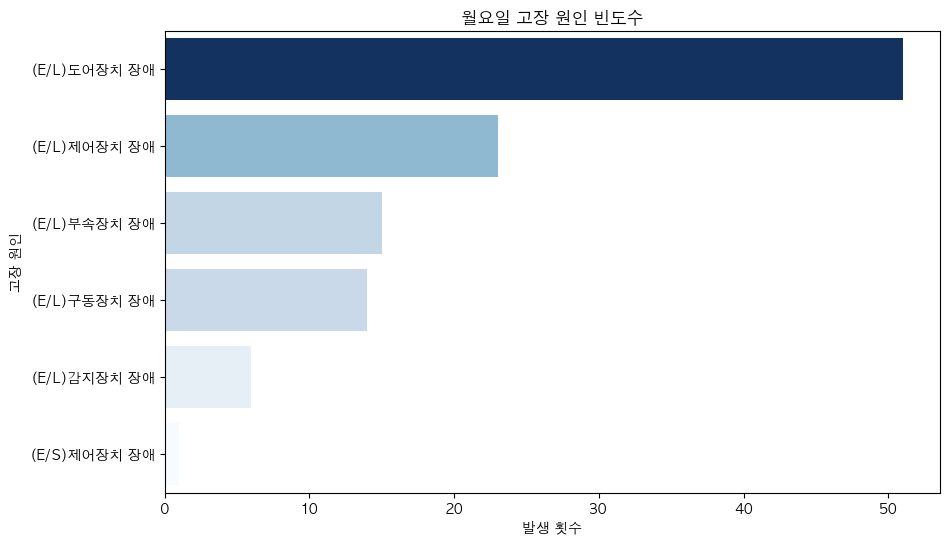

In [48]:
monday_counts = df[df['weekday'] == 'Monday']['고장원인'].value_counts()

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(
    x=monday_counts.values, 
    y=monday_counts.index, 
    hue = monday_counts.values, legend= False,
    palette="Blues"
)

# 제목 및 레이블
plt.xlabel("발생 횟수")
plt.ylabel("고장 원인")
plt.title("월요일 고장 원인 빈도수")
plt.show()

E/L : 엘리베이터
E/S : 에스컬레이터

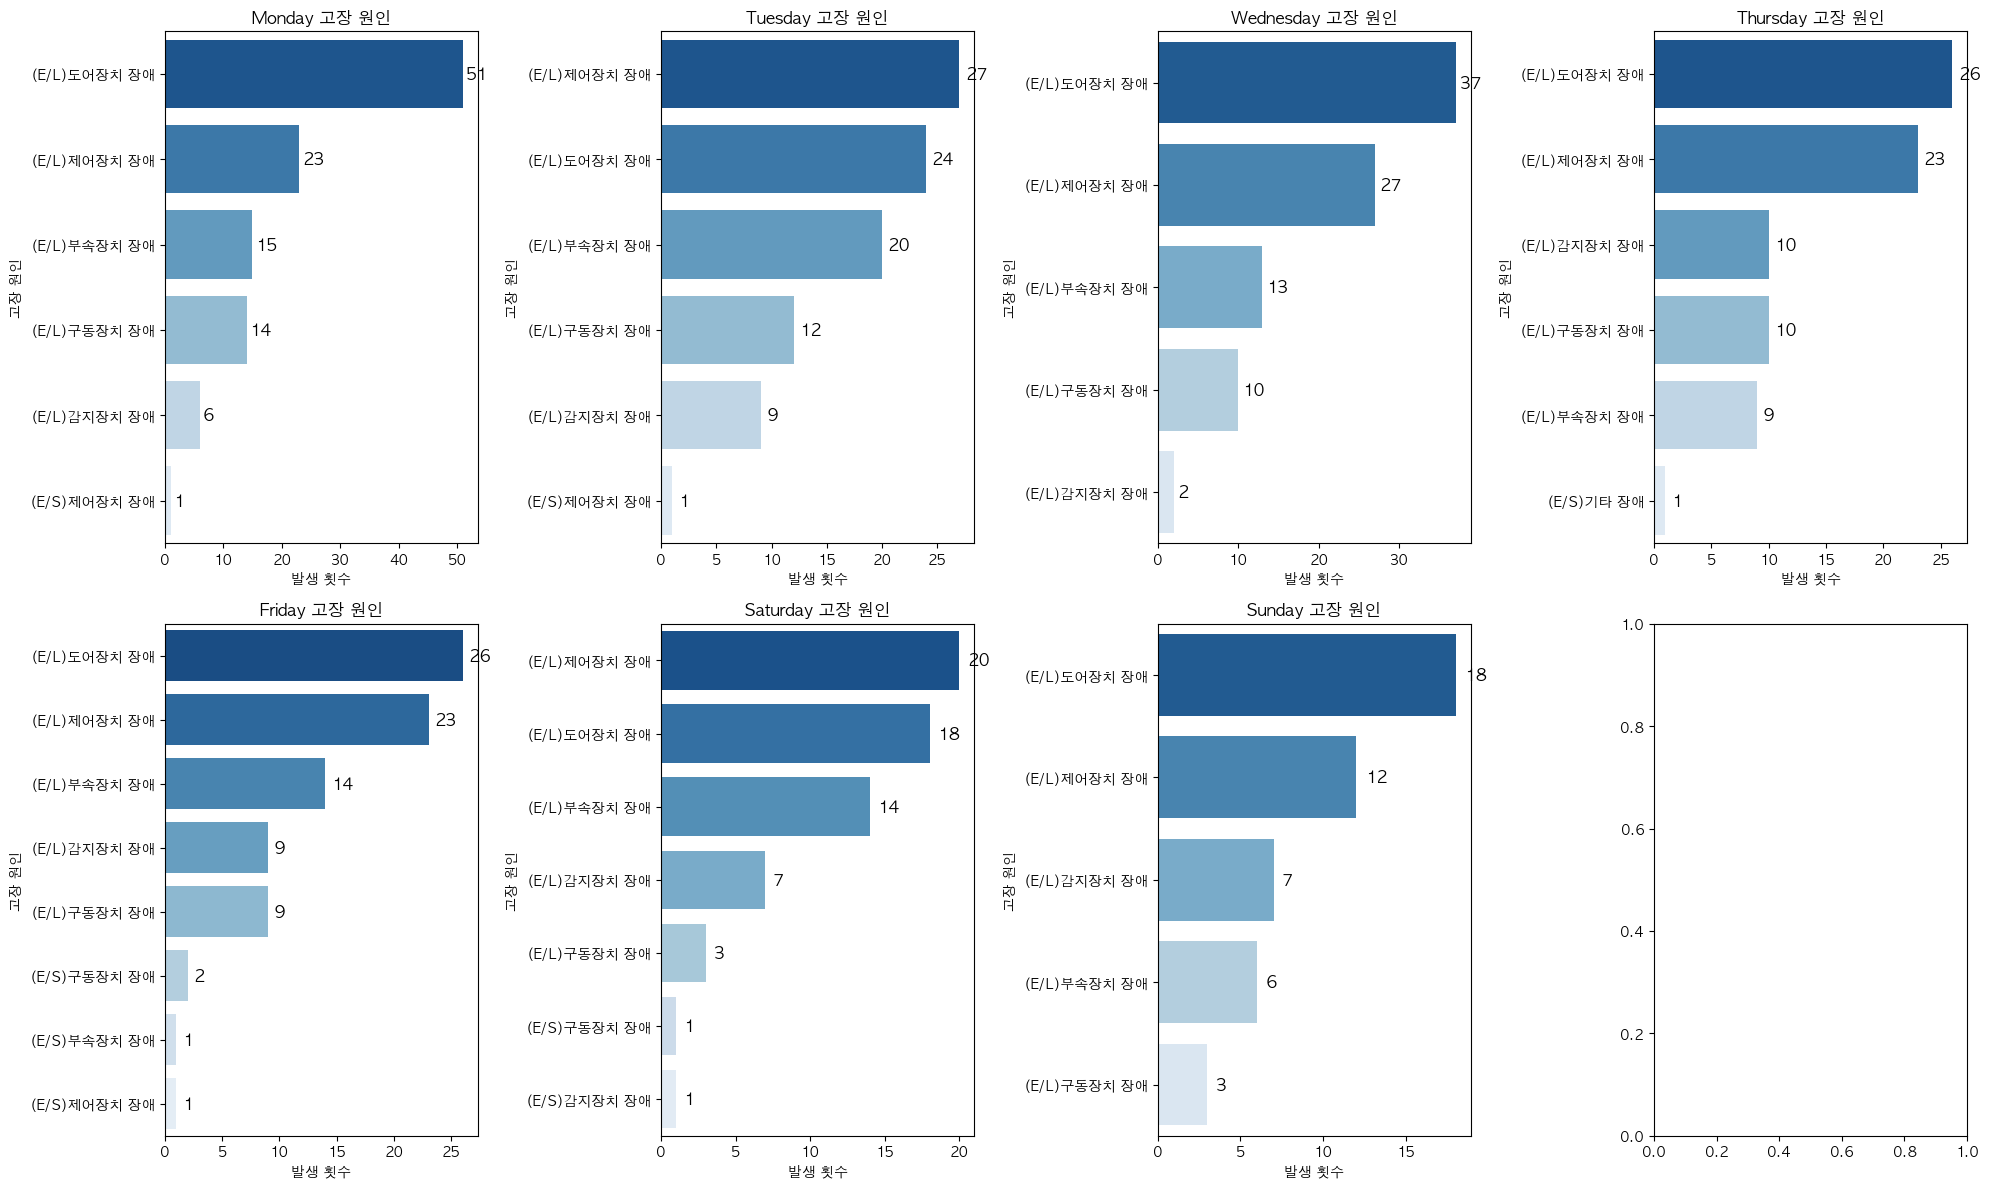

In [25]:
# 요일 리스트
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# 그래프 생성
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 12))  # 2행 4열 (마지막 하나는 빈칸)
axes = axes.flatten()  # 2D 배열을 1D 리스트로 변환

for i, day in enumerate(weekdays):
    weekday_counts = df[df['weekday'] == day]['고장원인'].value_counts()
    
    # 요일별 시각화
    sns.barplot(
        x=weekday_counts.values, 
        y=weekday_counts.index, 
        palette="Blues_r", 
        hue=weekday_counts.index,
        ax=axes[i]
    )
    
    # 막대 옆에 빈도 표시
    for index, value in enumerate(weekday_counts.values):
       axes[i].text(value + 0.5, index, str(value), va='center', fontsize=12, color='black')

    # 제목 및 레이블 설정
    axes[i].set_title(f"{day} 고장 원인")
    axes[i].set_xlabel("발생 횟수")
    axes[i].set_ylabel("고장 원인")

# 레이아웃 조정
plt.tight_layout()
plt.show()

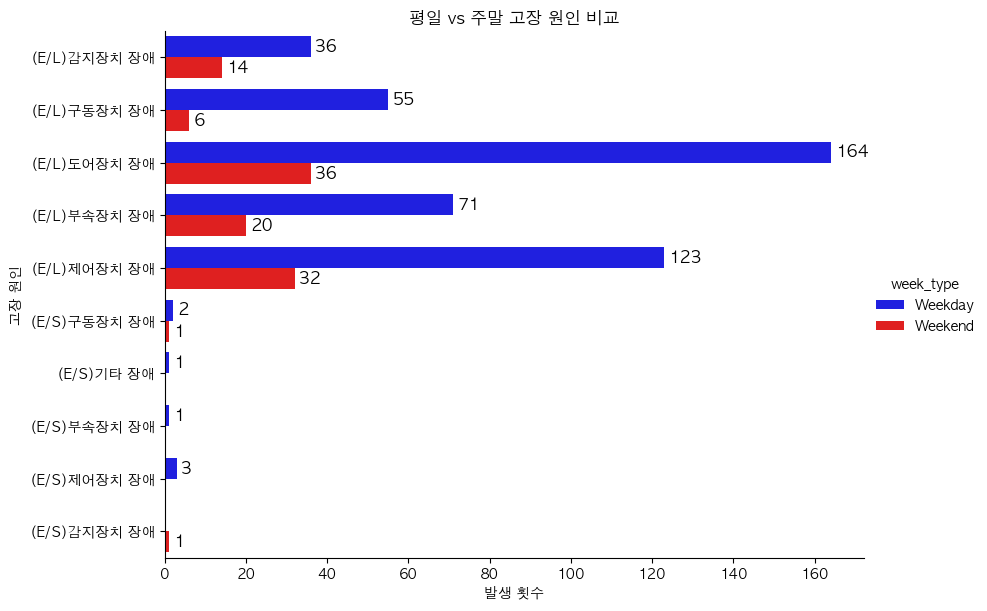

In [67]:


# 데이터 집계
df_grouped = df.groupby(['week_type', '고장원인']).size().reset_index(name='count')

# Seaborn catplot 이용한 시각화
g = sns.catplot(
    data=df_grouped,
    kind="bar",
    x="count",
    y="고장원인",
    hue="week_type",
    palette={"Weekday": "Blue", "Weekend": "Red"},
    height=6,  # 그래프 높이
    aspect=1.5  # 가로 비율 조정
)

# 막대 위에 빈도 표시
for ax in g.axes.flat:
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge', fontsize=12, color='black', padding=3)

# 제목 및 레이블
plt.xlabel("발생 횟수")
plt.ylabel("고장 원인")
plt.title("평일 vs 주말 고장 원인 비교")

plt.show()

## 조치 소요시간 분으로 변경

In [66]:
# 조치소요시간을 분으로 변환하는 함수
def time_to_minutes(time_str):
    hours, minutes = map(int, time_str.split(':'))  # "HH:MM"을 ':' 기준으로 나누고 정수 변환
    return hours * 60 + minutes  # 총 분으로 변환

# 새로운 컬럼 추가 (분 단위)
df['조치소요시간(분)'] = df['조치소요시간'].apply(time_to_minutes)

# 변환 결과 확인
print(f"최대 소요시간 : {max(df['조치소요시간(분)'])}")
print(f"최소 소요시간 : {min(df['조치소요시간(분)'])}")

최대 소요시간 : 1234
최소 소요시간 : 13


In [76]:
pd.set_option('display.max_rows', 1000)
df.groupby('역명').size().sort_values(ascending= False)

역명
월촌          40
반월당         35
다사          26
설화명곡        25
대공원         21
방촌          20
용산          18
신기          15
중앙로         14
정평          13
내당          13
대곡          12
명덕          12
신천          11
강창          11
성서산단        11
경대병원        10
동구청(큰고개)     9
동대구          9
송현           9
진천           9
해안           9
청라언덕         9
사월           8
대실           8
아양교          8
감삼           8
반고개          7
반야월          7
안심           7
교대           7
현충로          7
영남대          6
율하           6
안지랑          6
화원           6
상인           6
용계           5
신매           5
만촌           5
수성구청         5
서부정류장        5
월배           5
문양           5
임당           5
죽전           5
계명대          5
영대병원         5
2반월당         4
대구은행         4
각산           4
두류           4
대명           4
대구역          4
담티           4
범어           3
수성못(TBC)     3
달성공원         2
고산           2
팔달시장         2
칠성시장         2
연호           2
동촌           2
이곡           2
매천           2
공단           1
건들바위   